# Myanmar Text Classification Using CNN and BiLSTM

Dataset: https://github.com/ayehninnkhine/MyanmarNewsClassificationSystem

Ref:
- [1] https://hannibunny.github.io/mlbook/text/02TextClassification.html
- [2] https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [ ]:
dataset = "/content/mm-news-classification-dataset.csv"

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

data = pd.read_csv(dataset)
print(data.head())

   Unnamed: 0                                               News  Category
0           0  ဒီမိုကရေစီ_ရ_မှ_အမျှဝေ_ပါ_ဟု_မဝင်းမော်ဦး_တောင်...  Politics
1           1  ဒီမိုကရေစီ_အရေး_လူ့အခွင့်အရေး_တောင်းဆို_ဆန္ဒပြ...  Politics
2           2  ၂၀၁၅_ခုနှစ်_အထွေထွေရွေးကောက်ပွဲ_တွင်_အမျိုးသား...  Politics
3           3  လာမည့်_စက်တင်ဘာ_၁၉_ရက်_တွင်_မဝင်းမော်ဦး_ကျဆုံး...  Politics
4           4  တပ်မတော်ကာကွယ်ရေးဦးစီးချုပ်_ဗိုလ်ချုပ်မှူးကြီး...  Politics


In [ ]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from tensorflow.keras import regularizers, optimizers

# Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<Axes: xlabel='Category'>

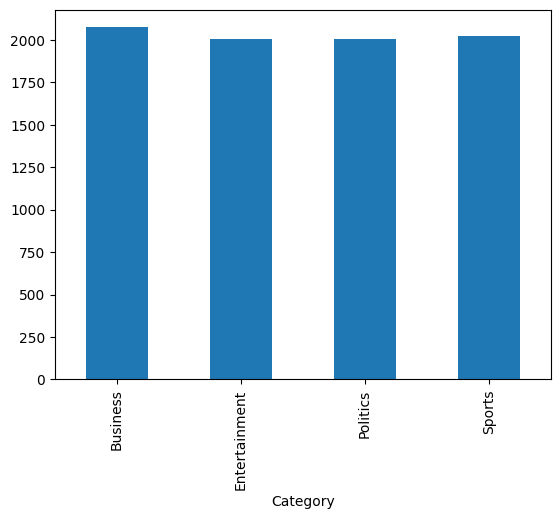

In [ ]:
data.isnull().sum()
data['category_id'] = data['Category'].factorize()[0]
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

In [ ]:
def clean_sentence(sentence):
    sentence = sentence.replace("_"," ")
    return sentence

data['News'] = data['News'].apply(clean_sentence)
data.head(10)

,Index,News,Category,category_id
0,0,ဒီမိုကရေစီ ရ မှ အမျှဝေ ပါ ဟု မဝင်းမော်ဦး တောင်...,Politics,0
1,1,ဒီမိုကရေစီ အရေး လူ့အခွင့်အရေး တောင်းဆို ဆန္ဒပြ...,Politics,0
2,2,၂၀၁၅ ခုနှစ် အထွေထွေရွေးကောက်ပွဲ တွင် အမျိုးသား...,Politics,0
3,3,လာမည့် စက်တင်ဘာ ၁၉ ရက် တွင် မဝင်းမော်ဦး ကျဆုံး...,Politics,0
4,4,တပ်မတော်ကာကွယ်ရေးဦးစီးချုပ် ဗိုလ်ချုပ်မှူးကြီး...,Politics,0
5,5,ထို တွေ့ဆုံ မှု တွင် မြန်မာနိုင်ငံ ငြိမ်းချမ်း...,Politics,0
6,6,ယနေ့ တွင် နေ့ချင်းပြန်ခရီး စဉ် အဖြစ် မြန်မာနို...,Politics,0
7,7,အလုပ်သမား တွေ နေပြည်တော် ကို ဆက်လက် ချီတက် မယ် ။,Politics,0
8,8,မန္တလေး တိုင်းဒေသကြီး စဉ့်ကိုင် မြို့ ဖါးလင်ပိ...,Politics,0
9,9,ခုံသမာဓိ ကောင်စီ ရဲ့ ကြားနာ စစ်ဆေးမှု ကို ခံယူ...,Politics,0


In [ ]:
data1 = data[["News", "category_id"]]

x = np.array(data1["News"])
y = np.array(data1["category_id"])

In [ ]:
category_id_to_label = dict(data[['category_id', 'Category']].drop_duplicates().values)
category_id_to_label

{0: 'Politics', 1: 'Sports', 2: 'Entertainment', 3: 'Business'}

In [ ]:
X = data['News'].fillna('').tolist()
X = [str(i) for i in X]
y = np.array(data['category_id'])

RANDOM_STATE = 42

# Split train & test
text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing and converting text data to word sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)
X_train_word = tokenizer.texts_to_sequences(text_train)
X_test_word = tokenizer.texts_to_sequences(text_test)

# Padding the sequences to the maximum length
maxlen = max(len(x) for x in X_train_word)  # Max length for padding
X_train_word_sequences = pad_sequences(X_train_word, maxlen=128)
X_test_word_sequences = pad_sequences(X_test_word, maxlen=128)

# Vocabulary size (1 reserved index added)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

# Training parameters
batch_size = 128
num_epochs = 30

# Model parameters
num_filters = 128
embed_dim = 300
weight_decay = 1e-4

Vocabulary size: 9891


In [ ]:
maxlen

519

In [ ]:
embed_dim

300

In [ ]:
# Building the model
model = Sequential()
model.add(Embedding(input_dim=9891, output_dim=300,  input_shape=(128,)))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(len(set(y_train)), activation='softmax'))  # Adjust according to your output classes

# Compiling the model
adam = optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 128, 300)            │       2,967,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_29 (Conv1D)                   │ (None, 128, 128)            │         268,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 64, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_30 (Conv1D)                   │ (None, 64, 128)             │         114,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_13              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,355,304 (12.80 MB)

 Trainable params: 3,355,304 (12.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X_train_word_sequences.shape)
print(y_train.shape)

(6492, 128)
(6492,)


In [ ]:
X_train_word_sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  347,   29,  655,  440, 1526, 1397,  551,   14,
        247, 3353,   65,  110,   41, 1160,  105,  112,   28,   19,  157,
          7, 1247, 1287,  166,   37, 1527,  733,   19, 2235,  319,    3,
        536,  623,    5,   34,   18,   46,    1], dtype=int32)

In [ ]:
history = model.fit(X_train_word_sequences, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.2)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.2890 - loss: 1.3734 - val_accuracy: 0.6243 - val_loss: 0.9198
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7093 - loss: 0.7249 - val_accuracy: 0.8707 - val_loss: 0.3608
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9407 - loss: 0.1867 - val_accuracy: 0.9038 - val_loss: 0.2935
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9837 - loss: 0.0657 - val_accuracy: 0.9015 - val_loss: 0.3397
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9916 - loss: 0.0318 - val_accuracy: 0.8984 - val_loss: 0.3767
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9976 - loss: 0.0184 - val_accuracy: 0.8992 - val_loss: 0.3776
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9973 - loss: 0.0155 - val_accuracy: 0.8953 - val_loss: 0.4342
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9982 - loss: 0.0113 - val_accuracy: 0.9053 -

In [ ]:
loss, accuracy = model.evaluate(X_test_word_sequences, y_test, verbose=2) # model.evaluate only returns loss and accuracy
print('Loss', loss)
print('Accuracy', accuracy)

51/51 - 0s - 3ms/step - accuracy: 0.8799 - loss: 0.9749
Loss 0.9748767018318176
Accuracy 0.8798521161079407


In [ ]:
model.save("cnn_model.keras")

In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = keras.models.load_model("cnn_model.keras")

input_text = ["ဘုတလင် မှာ စစ်တပ် က ပစ်ခတ် ပြီး စစ်ကြောင်း ဆက် ထိုး နေ"]

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(input_text)
input_sequences = loaded_tokenizer.texts_to_sequences(input_text)


input_sequences = pad_sequences(input_sequences, maxlen=128)

# Make predictions
predictions = model.predict(input_sequences)

# Get the predicted class (category ID)
predicted_class = np.argmax(predictions, axis=1)[0]

# Print the predicted class
print(f"Predicted category ID: {predicted_class}")

category_id_to_label = {0: 'Politics', 1: 'Sports', 2: 'Entertainment', 3: 'Business'}
print(f"Predicted category: {category_id_to_label[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Predicted category ID: 0
Predicted category: Politics


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM


# Building the BiLSTM model
lstm = Sequential()
lstm.add(Embedding(input_dim=9891, output_dim=300,  input_shape=(128,)))
lstm.add(Bidirectional(LSTM(128, return_sequences=True)))  # First LSTM layer
lstm.add(Dropout(0.5))  # Dropout for regularization
lstm.add(Bidirectional(LSTM(64)))  # Second LSTM layer (return_sequences=False by default)
lstm.add(Dropout(0.5))  # Additional Dropout
lstm.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))  # Dense layer
lstm.add(Dense(len(set(y_train)), activation='softmax'))  # Output layer

# Compiling the model
adam = optimizers.Adam(learning_rate=0.001)
lstm.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Summary of the model
lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 128, 300)            │       2,967,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128, 256)            │         439,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,575,208 (13.64 MB)

 Trainable params: 3,575,208 (13.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = lstm.fit(X_train_word_sequences, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.2)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.3555 - loss: 1.3077 - val_accuracy: 0.7575 - val_loss: 0.6802
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8003 - loss: 0.5656 - val_accuracy: 0.8584 - val_loss: 0.4131
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9298 - loss: 0.2205 - val_accuracy: 0.8761 - val_loss: 0.3785
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9630 - loss: 0.1182 - val_accuracy: 0.8614 - val_loss: 0.5188
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9762 - loss: 0.0855 - val_accuracy: 0.8714 - val_loss: 0.4668
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9925 - loss: 0.0386 - val_accuracy: 0.8768 - val_loss: 0.5414
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9901 - loss: 0.0361 - val_accuracy: 0.8730 - val_loss: 0.5955
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9944 - loss: 0.0265 - val_accuracy: 0.8776 - 

In [ ]:
loss, accuracy = lstm.evaluate(X_test_word_sequences, y_test, verbose=2)
print('Loss', loss)
print('Accuracy', accuracy)

51/51 - 1s - 13ms/step - accuracy: 0.8700 - loss: 0.7556
Loss 0.7555510997772217
Accuracy 0.8699938654899597


In [ ]:
lstm.save("lstm_model.keras")

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

lstm = keras.models.load_model("lstm_model.keras")

input_text = ["ဘုတလင် မှာ စစ်တပ် က ပစ်ခတ် ပြီး စစ်ကြောင်း ဆက် ထိုး နေ"]

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(input_text)
input_sequences = loaded_tokenizer.texts_to_sequences(input_text)


input_sequences = pad_sequences(input_sequences, maxlen=128)

# Make predictions
predictions = lstm.predict(input_sequences)

# Get the predicted class (category ID)
predicted_class = np.argmax(predictions, axis=1)[0]

# Print the predicted class
print(f"Predicted category ID: {predicted_class}")

category_id_to_label = {0: 'Politics', 1: 'Sports', 2: 'Entertainment', 3: 'Business'}
print(f"Predicted category: {category_id_to_label[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Predicted category ID: 0
Predicted category: Politics
